# 01 - Introduction To Causality

## Data Science is Not What it Used to Be (or it Finally Is)
---

- Jim collins가 본 데이터 과학 -> 잘 따른 맥주
    - 맥주 (Beer) : 통계적 기초, 과학적 호기심, 복잡한 문제에 대한 열정 - 앞의 모든 가치들은 수백년동안 매우 가치있다고 증명되었어요.
    - 거품 (Foam) : 결국에 사라질 이 거품은 비현실적인 기대를 기반으로 만들어졌어요.



- 벤처캐피털 펀드인 MMC가 유럽 AI 스타트업들을 대상으로 한 설문조사에 따르면, 40%가 AI를 전혀 사용하지 않음.


- 조언
    - 첫 번째 맥주의 거품(Foam)을 무시하는 법을 배우자. 수학과 통계학은 앞으로도 계속 유용할 것이며, 해당 학문이 필요하지 않은 일은 없을 것이다.
    - 어느 누구도 어떻게 사용해야 하는지 모르는 번지르르한 최신 도구가 아닌, 여러분의 일을 가치 있게 만드는 것이 무엇인지 배우자.
    - 마지막으로, 데이터 과학을 배움에 있어 지름길은 없다. 수학 및 통계학 지식은 습득하기 어렵기 때문에 정말 가치가 있다. 모든 사람이 할 수 있다면 초과 공급으로, 가격이 낮아진다. 그러므로, 의지를 강하게 가지고 해당 지식을 가능한 한 잘 배우자. 용감하고 진실된 사람들 (For the Brave and True)만을 위한 이 여정을 시작하는 동안 즐거운 시간 보내시길 바란다!
    
    


## Answering a Different Kind of Question
---
- Ajay Agrawal(추천시스템 저자는 다름), Joshua Gans, Avi Goldfarb는 "Prediction Machines"에서 'AI는 새로운 물결은 실제로 우리에게 지능을 가져다주는 것이 아닌, 지능의 주요 구성 요소인 예측을 가져다준다' 라고 함.
- 하지만 머신러닝은 만병통치약이 아니다. 엄격한 경계에서는 좋은 성능을 내지만, 학습데이터와 다르다면 제대로 작동하지 않을 수 있다.
- "Prediction Machines"에서는 예시로 머신러닝은 호텔산업에서 가격을 인상하면, 더 많은 객실이 팔릴 것으로 제안할 수 있다.(인과관계)


- 인과추론의 문제는 "만약에 (What If)"의 질문에 답할 것을 요구한다. 하지만 머신러닝은 상관관계 유형 예측에 의존하여 인과추론의 문제를 해결할 수 없다.
- 인과관계 질문에 대한 답은 사람들의 인식보다 훨씬 어렵다. "연관은 인과관계가 아니다"를 설명하는 것은 꽤 복잡하다.
- 책은 연관성에서 인과관계를 찾는 방법을 알아내는데 집중한다.





## When Association IS Causation
---
- 직관적으로 우리는 연관성은 인과관계가 아닌 이유를 알고 있다.
- 어떤 사람이, 태블릿을 제공하는 학교의 학생들이 더 학업 성과가 좋다고 한다면, 그 것은 아마 태블릿을 제공하는 학교에 다니는 사람들이 더 부유하기 때문이라고 지적할 수 있다.
- **이러한 이유로 우리는 학생들에게 태블릿을 제공하는 것이 학업 성과를 높이는데 도움을 줄 수있다고 결론을 지을 수 없다.(인과성 X) 우리는 단지, 학업성과와 태블릿 제공하는 것이 연관성이 있다고만 할 수 있다.**

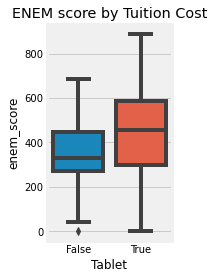

In [2]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

np.random.seed(123)
n = 100

# tuition 수업료 ~ N(1000, 300^2) 
tuition = np.random.normal(1000, 300, n).round()

# tablet 태블릿 제공 여부
# expit: Logistic function
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)

# 학업 성과 = (0.7 x 수업료 - 50 x 태블릿 제공 여부 + 200 ) + ϵ 
# ϵ ~ N(0, 200^2)
# 학업 성과|수업료,태블릿제공여부 ~ N((0.7 x 수업료 - 50 x 태블릿 제공 여부 + 200 , 200^2)

enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))

plt.figure(figsize=(2,4))
sns.boxplot(y="enem_score", x="Tablet", data = data).set_title('ENEM score by Tuition Cost')
plt.show()



## 인과추론의 용어 정리
---

- i: unit, 실험 대상


- $T_{i}$: i에 대한 Treatment(처방, 처치, 처리) 여부
    - $T_i=\begin{cases}1 \ \text{: 실험대상 i가 Treatment를 받은 경우}\\0 \ \text{: 실험대상 i가 Treatment를 받지 않은 경우}\\\end{cases}$
    - 이 때, Treatment는 꼭 의료분야일 필요는 없다. 대신 효과(effect)를 알고자 하는 일부 개입(intervention)을 나타내는 데 사용할 용어이다.
    - 위에서의 T는 태플릿 제공 여부이다. $T$ 대신 $D$가 표시되는 경우도 있다.
    
    
    
- $Y_i$: 관찰된 결과 변수 (Outcome variable)
    - 우리는 Treatment (처치)가 Outcome(결과)에 영향을 미치는지 알고 싶다.
    - **인과추론의 근본적 문제:Treatment가 있든 없든 같은 실험 대상에 대해 동시에 관찰할 수 없다**
        - 이러한 문제를 해결하기 위해 **Potential Outcomes(잠재적 결과)**에 대해 많은 이야기를 한다.


- $Y_{0i}, Y_{1i}$ Potential Outcomes: 실제로 일어나지 않았으나, 일어났다면 발생할 수 있는 결과
    - 잠재적인 이유는 실제로 일어나지 않았기 때문이며, **만약 일어났다면** 어떤 결과가 나왔을지를 의미한다.
    - $Y_{0i}$ : i의 Treatment를 받지 않은 Potential Outcomes
    - $Y_{1i}$ : **같은 실험대상 i**의 Treatment를 받은 Potential Outcomes
    - 때때로, Potential Outcomes는 함수와 같이 $Y_{i}(t)$로 표현될 수 있다.
        - $Y_{0i}$는 $Y_{i}(0)$, $Y_{1i}$는 $Y_{i}(1)$ 으로 표현할 수 있으며, 이 책에서는 $Y_{0i}, Y_{1i}$으로 표기할 것이다.


- Factual: Potential Outcomes that happenend. 일어난 (잠재적) 결과
- Counterfactual: Potential Outcomes that happenend. 일어나지 않은 잠재적 결과


        
- ITE & ATE & ATT/ATET
    - $Y_{1i} - Y_{0i}$: ITE(Individual Treatment Effect), 개별 처치 효과
    - $E[Y_1 - Y_0]$: ATE(Individual Treatment Effect), 평균 처치 효과
    - $E[Y_1 - Y_0 | T=1]$: ATT/ATET(Average Treatment effect on the Treated), 처치받은 그룹에 대한 평균 처치 효과
    - 인과추론의 근본적 문제(데이터로서는) ITE를 알 수 없다. 따라서, 보다 측정하기 쉬운 ATE나 ATT를 확인한다.
    



### 예시에 적용
---

- 우리는 Potential Outcomes는 볼 수 없지만, '신의 능력'을 가졌다고 가정하고 Potential Outcomes들을 볼 수 있다고 가정해보자.
- 이러한 능력으로 4개의 학교에 대한 데이터를 수집했다. 태블릿을 제공한 한교를 T=1이라 하고, Y는 학업 성과이다.


- ATE: `te` 칼럼(ITE)의 평균이다.
    - $ATE=(-50 + 0 - 200 + 50)/4 = -50$
    - **이는 학교의 태블릿의 제공은 학생들의 학업 성과를 평균적으로 50점 감소했음을 의미한다.**
    
    
- ATT: T=1일 때(실제로 태블릿을 제공한 학교들의 ITE)의 평균이다.
    - $ATT=(- 200 + 50)/2 = -75$
    - **이는 학교의 태블릿의 제공은 학생들의 학업 성과를 평균적으로 75점 감소했음을 의미한다.**


In [3]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    y0=[500,600,800,700],
    y1=[450,600,600,750],
    t= [0,0,1,1],
    y= [500,600,600,750],
    te=[-50,0,-200,50],
))

,i,y0,y1,t,y,te
0,1,500,450,0,500,-50
1,2,600,600,0,600,0
2,3,800,600,1,600,-200
3,4,700,750,1,750,50


- 당연히 우리는 Potential Outcomes를 볼 수 있지 않다. 실제 우리가 보는 테이블은 아래다.


- 보다시피, 아래 표는 인과관계를 계산하기 어렵다. 아래와 같이 ATE를 두 그룹의 평균을 비교하는 것 
    - $ATE=(600+750)/2 - (500 + 600)/2 = 125$
- 이 것은 연관성을 인과관계로 착각하는 것이다. 이유를 이해하기 위해 편향에 대해 살펴보자.

In [4]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    y0=[500,600,np.nan,np.nan],
    y1=[np.nan,np.nan,600,750],
    t= [0,0,1,1],
    y= [500,600,600,750],
    te=[np.nan,np.nan,np.nan,np.nan],
))

,i,y0,y1,t,y,te
0,1,500.0,NaN,0,500,NaN
1,2,600.0,NaN,0,600,NaN
2,3,NaN,600.0,1,600,NaN
3,4,NaN,750.0,1,750,NaN


## Bias (편향)
---

- 편향은 연관성과 인과관계를 구분한다. 그리고 우리의 직관으로 쉽게 이해할 수 있다.
- 위 예시로 돌아가보자
    - 태블릿의 제공 여부가 학업성과로 이어진다는 주장의 반박으로, 태블릿의 제공 여부는 다른 학교보다 돈이 많다는 것을 의미하고, 다른 학교보다 더 나은 교사나 환경을 구성할 수 있다고 할 수 있다.
    - 즉, 처리된(태블릿 제공 여부, treated) 학교와 처리되지 않은(untreated)을 비교할 수 없다.



- 이를 Potential Outcome의 개념으로 설명하면, 처리된 $Y_{0}$와 처리되지 않은 $Y_{0}$가 다르다.
- 이 때, 처리 받은 $Y_{0}$는 Counterfactual(반사실)이며, 관찰할 수 없으나 추론 할 수 있다.
- 반사실을 추론하기 위해서 도메인 지식 등을 활용해 더 합리적으로 추론할 수 있다.
    - 위 예시에서는, **태블릿을 제공하는 $Y_{0}$와 제공하지 않는 $Y_{0}$가 더 크다고 말할 수 있다.**
    - **이는 다시 말해, 학생들에게 태블릿을 제공하는 학교는 시험 점수에 영향을 주는 다른 요인들이 존재할 수 있다고 말하는 것이다.**
- 이 단락을 이해하는 것이 중요하다.


- 이를 염두하고 연관성이 인과관계가 아닌 경우인 이유를 수식으로 보이자.
- 연관성과 인과관계는 아래와 같이 측정한다.
    - 연관성: $E[Y|T=1] - E[Y|T=0]$
    - 인과성: $E[Y_1 - Y_0]$


- 연관성을 측정하고, 관촬된 결과(observed outcomes)를 잠재적 결과(potential outcomes)로 바꿔보자.
    - 처리된 경우의 관찰 결과: $Y_1$, 처리받지 않은 경우 관찰된 결과: $Y_0$이다.
    - $ E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0] $
        - 이제, $E[Y_0|T=1]$를 더하고 뺀다.
        - 이 부분은 counterfactual outcome에 대한 부분이며, 처치를 받지 않았다면 처치의 결과가 어떠했을 것인지를 의미한다.
    - $E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0] + E[Y_0|T=1] - E[Y_0|T=1] $
        - 위를 정리하면, 아래와 같다.
        
        
$$E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATT} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}$$







- **위 수식이 우리가 인과적 질문에서 마주치게될 모든 문제들을 포함한다.**
    - 위 수식의 모든 측면을 이해하는 것이 굉장히 중요하며 위 식이 우리에게 말하는 것을 깊이 이해해야한다.
    
    
- 먼저 위 식은 연관성이 인과관계가 아닌 이유를 알려준다.
    - 식에서 보면, 연관성은 처리에 대한 처리 효과(ATT)에 Bias를 더한 것이다.
    - **Bias는 실험군(처리 O)과 대조군(처리 X) 모두 처리를 받거나 받지 않기 전에, 두 군이 얼마나 다른 지를 나타낸다.**
        - 위 예시에서 $E[Y_0|T=0] < E[Y_0|T=1]$이라면 태블릿을 제공 여부와 관계없이, 태블릿을 제공할 수 있는 학교가 그렇지 않은 학교보다 이미 학업 성적이 우수했다고 볼 수 있다.
    - 이는 나중에 나오는 교란변수(Confounding Varaible)과 관련이 있으며, 이는 우리가 통제할 수 없는 많은 변수들이 처리와 함께 바뀌기 때문에 발생하는 편향으로 볼 수 있다.
        - 결과적으로 태블릿을 제공한 학교와 아닌 학교는 태블릿에서만 차이가 있지 않다. 이외에 수업료, 위치, 교사 수준 등의 변수들의 평균적으로 비슷해야 태블릿의 제공 여부로 비교할 수 있다.






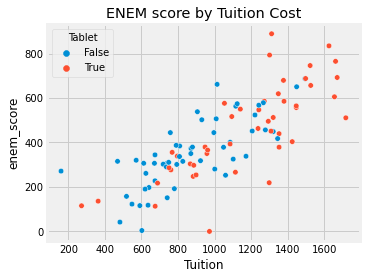

In [5]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Tuition", y="enem_score", hue="Tablet", data=data, s=30)\
    .set_title('ENEM score by Tuition Cost')
plt.show()

$$E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATT} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}$$
- 문제를 이해했으니 해결하는 방법을 알아보자.

- 연관성을 인과관계로 만드는 방안은 위 식에서 Bias를 없애는 것이다.
    - 즉, **$E[Y_0|T=0] = E[Y_0|T=1]$ 인 경우 연관성은 인과관계와 같아진다.**
    - Bias를 없앤다는 것 $E[Y_0|T=0] = E[Y_0|T=1]$은 실험군과 대조군이 비교 가능하다는 것을 의미한다.
    
    
- 처리된 집단이 처리되지 않았었고 처리받기 전의 $Y_{0}$를 관찰할 수 있다면, 처리되지 않은 집단과 결과가 같을 것을 의미한다.
    - $E[Y|T=1] - E[Y|T=0] = E[Y_1 - Y_0|T=1] = ATT$
    
    
- 처리된 그룹과 처리되지 않은 그룹이 Treatment 자체에서만 다른 경우, $E[Y_0|T=0] = E[Y_0|T=1]$이다.
    - 처리 받은 그룹에서 나타난 인과효과는 처리받지 않은 그룹에서도 동일하게 일어날 것이다. (두 그룹이 유사하기 때문에) 이를 수학적으로 아래와 같이 표현할 수 있다.
    - $\begin{align}E[Y_1 - Y_0|T=1] &= E[Y_1|T=1] - E[Y_0|T=1] \\ &= E[Y_1|T=1] - E[Y_0|T=0] 
        \\ &= E[Y|T=1] \ -  E[Y|T=0]\end{align}$
    - 이는 두 비교가능한 그룹인 경우, **두 집단의 평균차이는 인과효과(Causal Effect)**라는 것을 의미한다.
        - $ E[Y|T=1] - E[Y|T=0] = ATT$

- 위와 비슷하게 처리된 그룹과 처리되지 않은 그룹이 Treatment에서만 다른 경우, $E[Y_1|T=0] = E[Y_1|T=1]$로도 표현할 수 있다.
    - 이는 대조군, 실험군이 모두 Treatment에 유사하게 반응한다는 것이며,
    - **처리전의 대조군과 실험군이 교환가능한 것 뿐만 아니라, 처리 후의 대조군과 실험군이 교환 가능하다는 것이다.**
        - $E[Y_1 - Y_0|T=1]=E[Y_1 - Y_0|T=0]$
    - 결론 적으로 아래와 같이 정리할 수 있다.

$$ E[Y|T=1] - E[Y|T=0] = ATT = ATE $$



- 위 내용은 중요하기 때문에, 그림으로 다시 짚고 넘어가자.
    - 실험군과 대조군을 단순하게 평균을 비교하면 아래와 같다. (빨간색 처리된 그룹, 태블릿 제공하는 학교) :
    - <img style="float:left; margin-right:100%;" width="400" src="./data/img/intro/anatomy1.png">
    - 두 그룹간의 결과 차이는 아래 2가지 원인으로 생각할 수 있다.
        1. 처리 효과: 두 군의 차이는 학업 성과는 태블릿을 제공함으로써 발생한다.
        2. 다른 효과: 두 군의 차이는 수업료 등의 다른 차이로 발생한다. 태블릿을 제공하는 학교의 수업료가 비싸기 때문에 두 군의 차이가 생기며, 두 군의 학업성과의 차이는 Treatment(태블릿의 제공)의 차이가 아니다.


- 아래의 왼쪽 이미지는 ITE를 표현한 것이다.
    - ITE(개별 처리 효과)는 각 Unit(샘플, 학교)에 대한, 실제 일어난 처리와 일어나지 않은 처리가 일어났을 때의 이론적 결과와의 차이이다.
    - 실제 처리 효과는 우리가 신의 능력이 있을 때만 관찰할 수 있다. 이를 관찰 할 수 있다면, 왼쪽 그림과 같고 옅은 색으로 표시했다.
- 아래의 오른 쪽 이미지는 Bias에 대해 표현한 것이다. 
    - 모두가 동일한 처리를 받지 않는 것이라면, 편향이 생긴다. 처리된 그룹의 Potetential Outcome만 남기고, 처리되지 않은 그룹을 남기면 두 그룹의 차이를 볼 수 있다.
    - 차이가 있다면, 처리 이외의 다른 요인이 실험군과 대조군을 다르게 만드는 원인일 것이다. 이것이 편향이다.
    - <img style="float:left; margin-right:100%;" width="600" src="./data/img/intro/anatomy2.png">
    
    
- 이제 편향이 없는 상황을 가정해보자.
    - 학교의 태블릿 제공은, 수업료에 고르게 제공되었다고 가정한다.
    - 이런 경우에는 처리받은 그룹과 받지 않은 그룹의 차이는 평균인과효과(ATT)에 해당한다. 왜냐하면, 처리이외에 처리받은 그룹과 받지않은그룹 사이의 차이의 다른 원인이 없기 때문이다. 즉, Bias가 없다.
    - <img style="float:left; margin-right:100%;" width="400" src="./data/img/intro/anatomy3.png">
    - 모든 학교가 태블릿을 제공받지 않는 $Y_0$들만 관찰하도록 설정하면, 이번 예시에서 실험군과 대조군의 차이가 존재하지 않는다.
    - 이러한 부분이 인과추론에서 어려운 부분이다. Bias를 제거하고 실험군과 대조군을 비교할 수 있는 방안을 찾아, 모든 차이가 ATE(평균처리효과)만으로 추정할 수 있게 하는 것이다. 
    - <img style="float:left; margin-right:100%;" width="600" src="./data/img/intro/anatomy4.png">

- 궁극적으로 인과추론은 망상이나 잘못된 해석을 없애고, 세상이 어떻게 돌아가는지 이해하는 것이다. 

## References
--- 
- English: https://matheusfacure.github.io/python-causality-handbook/01-Introduction-To-Causality.html#
- Korean: https://github.com/CausalInferenceLab/Causal-Inference-with-Python/blob/main/01-Introduction-To-Causality.ipynb
- 실험군, 대조군
    - https://m.blog.naver.com/yolwooju/221955573649